# 主成分分析

## 主成分分析の基礎

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

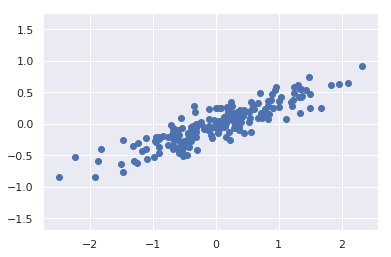

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

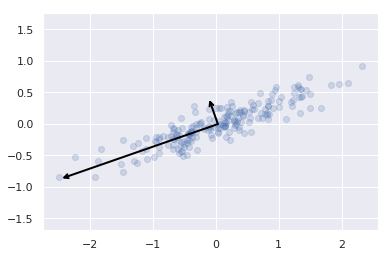

In [8]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

## PCAによる次元削除

In [9]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape: ', X.shape)
print('transformedl shape: ', X_pca.shape)

original shape:  (200, 2)
transformedl shape:  (200, 1)


(-2.771528780690219, 2.661757596590678, -0.9964674432667128, 1.021908177590081)

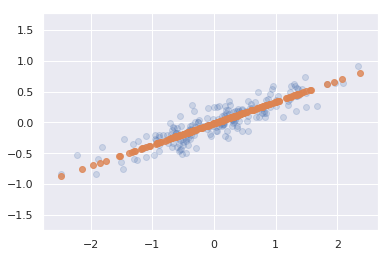

In [10]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

## PCAによる可視化：手書き数字

In [11]:
from sklearn.datasets import load_digits

In [12]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


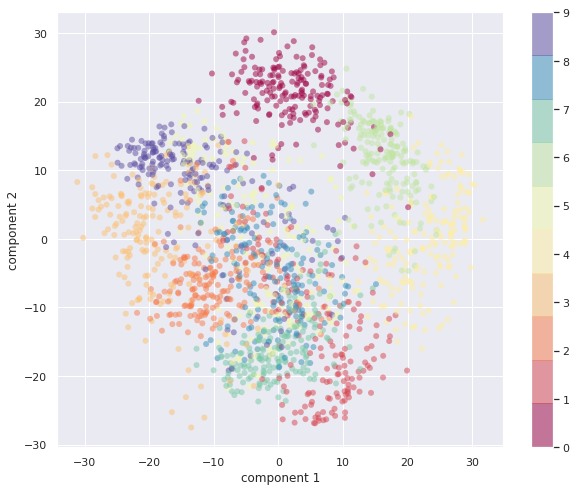

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(projected[:, 0], projected[:, 1],
                    c=digits.target, edgecolors='none', alpha=0.5,
                    cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()